In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('creditcard.csv',nrows=25000)
pd.set_option('display.max_columns',None)

FileNotFoundError: [Errno 2] No such file or directory: 'creditcard.csv'

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Preprocessing and EDA:


### Missing values:

In [5]:

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### There are no missing values in the dataset


## Categorical data:

In [133]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    25000 non-null  int64  
 1   V1      25000 non-null  float64
 2   V2      25000 non-null  float64
 3   V3      25000 non-null  float64
 4   V4      25000 non-null  float64
 5   V5      25000 non-null  float64
 6   V6      25000 non-null  float64
 7   V7      25000 non-null  float64
 8   V8      25000 non-null  float64
 9   V9      25000 non-null  float64
 10  V10     25000 non-null  float64
 11  V11     25000 non-null  float64
 12  V12     25000 non-null  float64
 13  V13     25000 non-null  float64
 14  V14     25000 non-null  float64
 15  V15     25000 non-null  float64
 16  V16     25000 non-null  float64
 17  V17     25000 non-null  float64
 18  V18     25000 non-null  float64
 19  V19     25000 non-null  float64
 20  V20     25000 non-null  float64
 21  V21     25000 non-null  float64
 22

### There are no categorical columns in the dataset.


## Outlier Treatment:

### Outlier treatment can't be done as this is a dataset which has undergone Principal Component Analysis.
### Capping method using IQR is not preffered as information will be lost.
### Transformation techniques like log,sqrt, exponential ,box_cox won't work as there are values that are very close to
### zero and negative values as well.

## Conclusion: So it is better not to do outlier treatment here.

## Data Imbalancedness:

In [10]:

df['Class'].value_counts(normalize=True)*100

0    99.648
1     0.352
Name: Class, dtype: float64

### The data is highly imbalanced....as number of 0's(not fraud) is 99.7%  whereas for 1(fraud) it is 0.296%.

### since the value of 1's is too small it is better to go with oversampling.
### So SMOTE technique is used.

In [12]:
## Splitting the data into X,y
X=df.drop('Class',axis=1)
y=df['Class']

In [13]:
from  imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=0.1,random_state=10)
X_sm,y_sm=smote.fit_resample(X,y)

In [14]:
y.value_counts(normalize=True)*100 ## original Percentage difference in target column

0    99.648
1     0.352
Name: Class, dtype: float64

In [15]:
y_sm.value_counts(normalize=True)*100 ## After applying SMOTE to the target column.

0    90.909754
1     9.090246
Name: Class, dtype: float64

## Scaling the data

In [16]:

from sklearn.preprocessing import StandardScaler

In [17]:
ss=StandardScaler()
X_sm1=ss.fit_transform([X_sm['Time'],X_sm['Amount']])

In [18]:
X_final=pd.DataFrame(X_sm1).T

In [19]:
X_final.columns=['Time','Amount']

In [20]:
X_sm=X_sm.drop(['Time','Amount'],axis=1)

In [21]:
X1=pd.concat([X_sm,X_final],axis=1)

In [22]:
X1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-1.0,1.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-1.0,1.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-1.0,1.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,-1.0,1.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-1.0,1.0


## EDA:


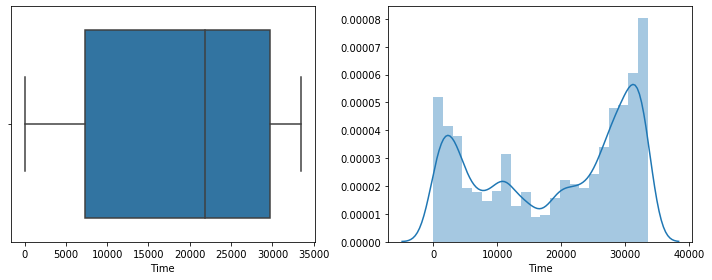

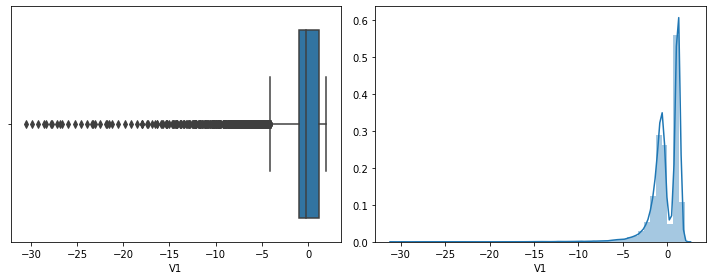

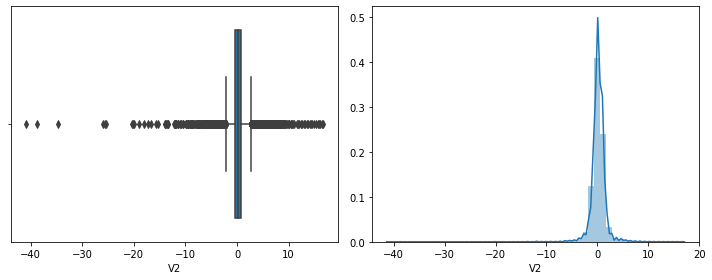

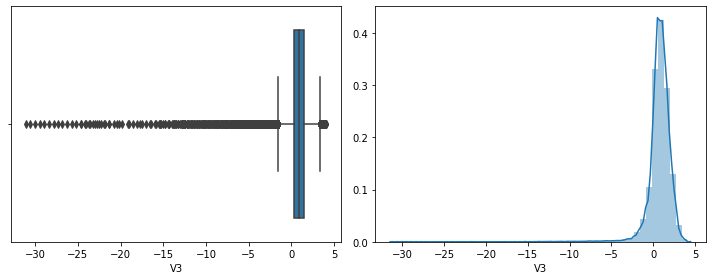

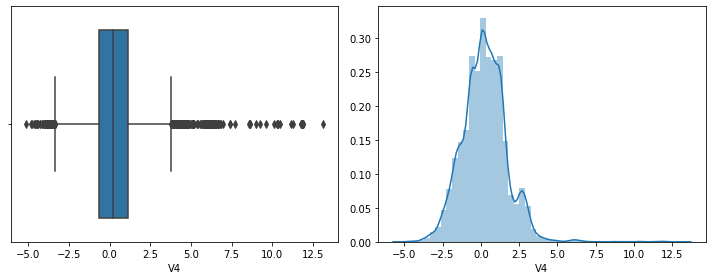

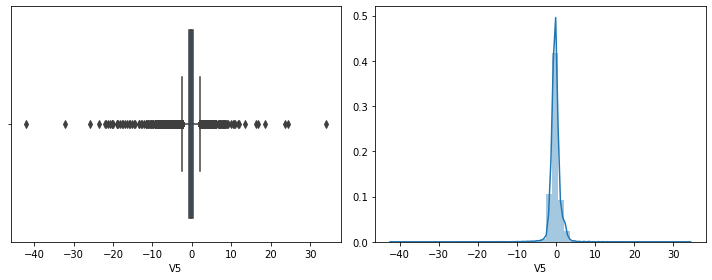

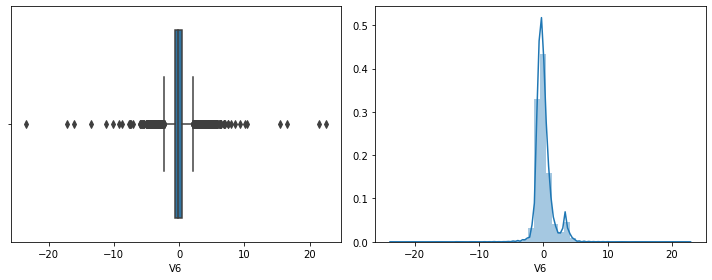

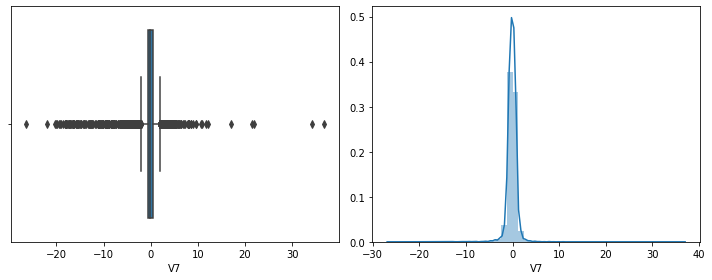

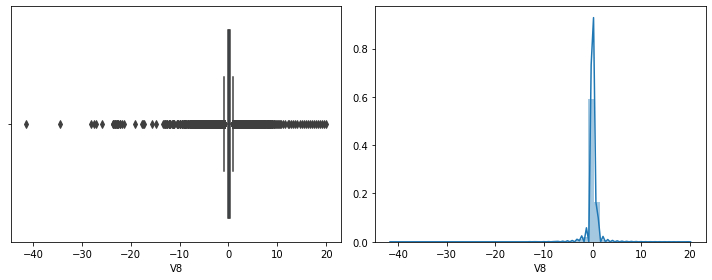

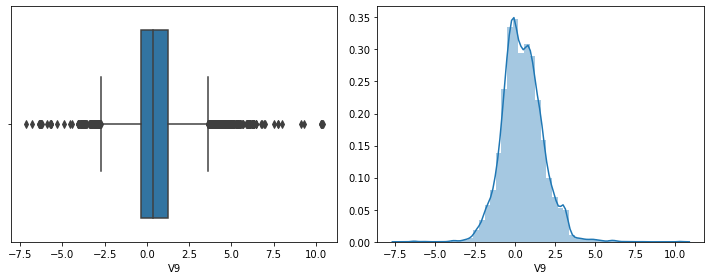

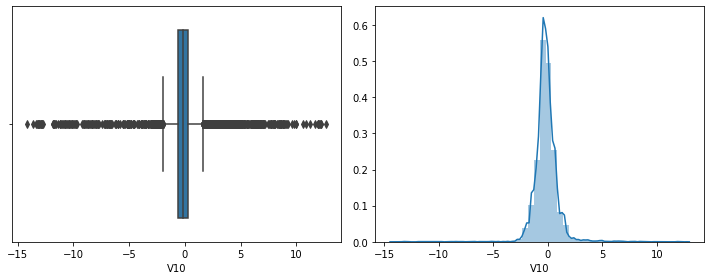

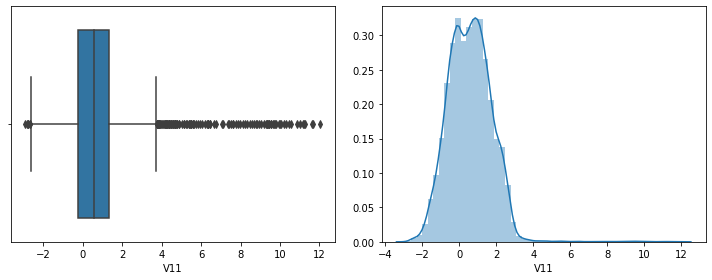

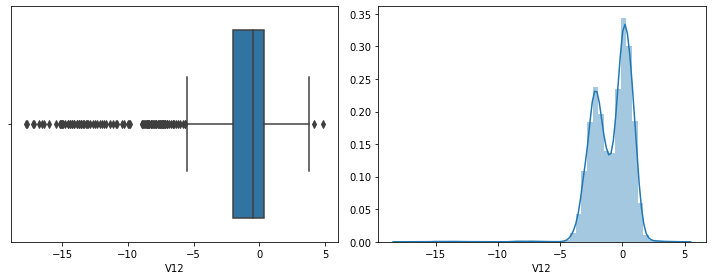

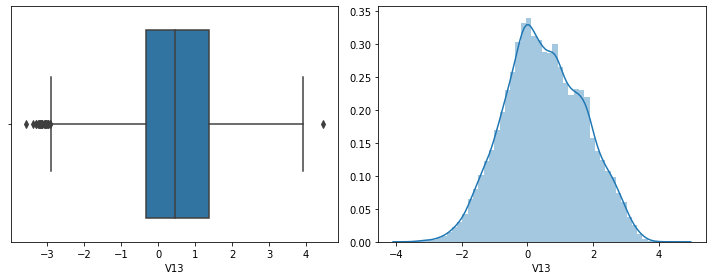

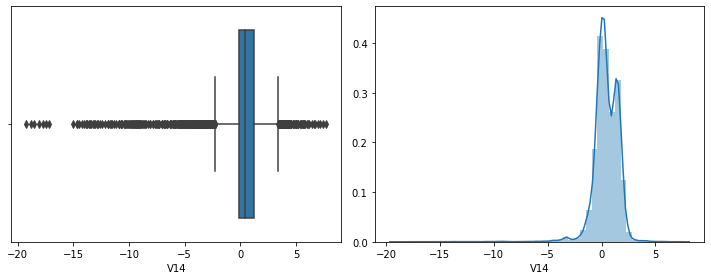

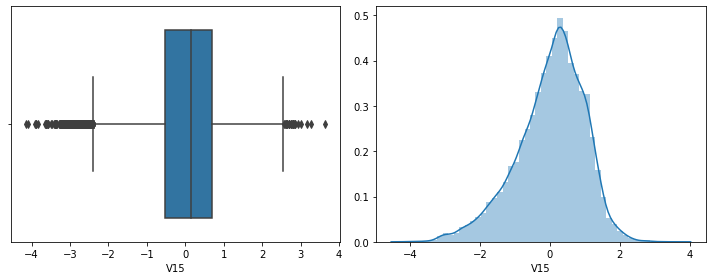

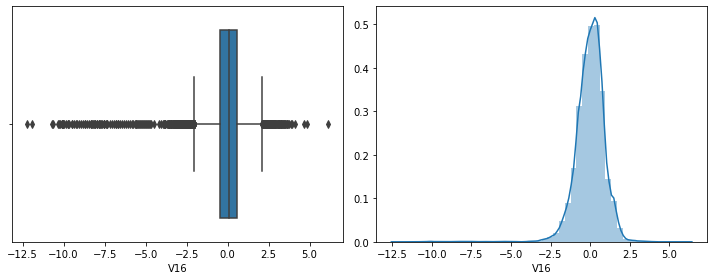

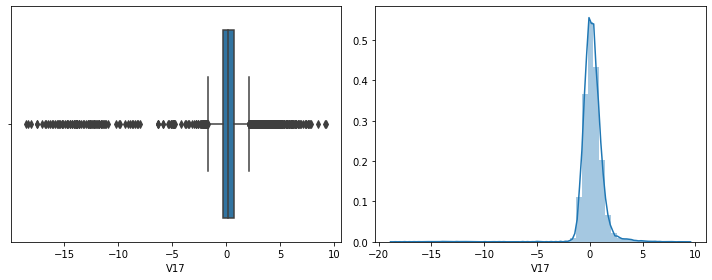

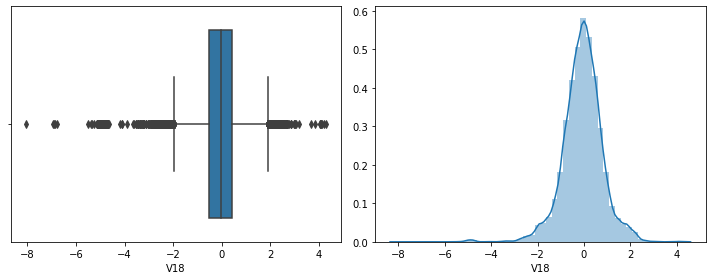

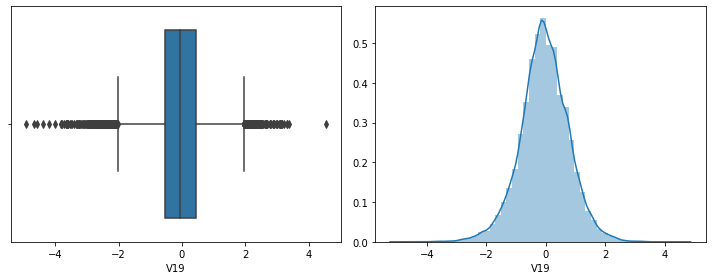

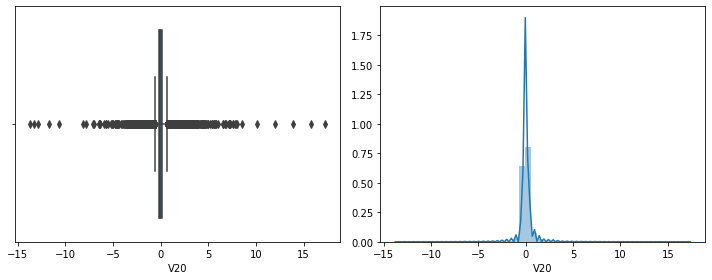

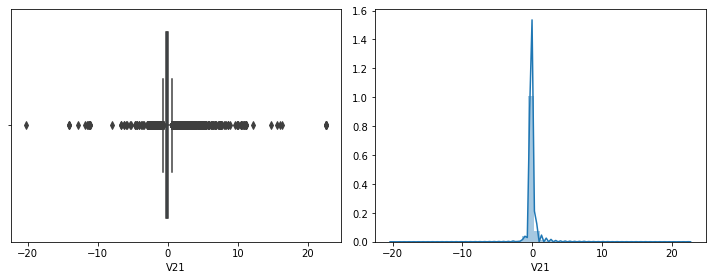

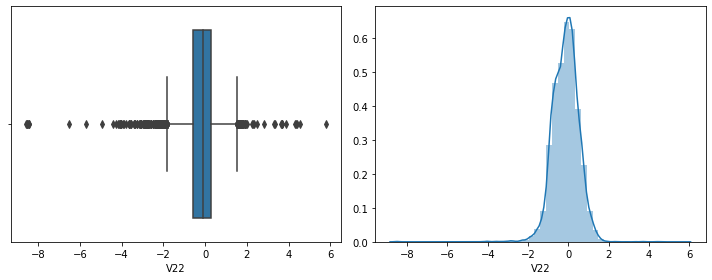

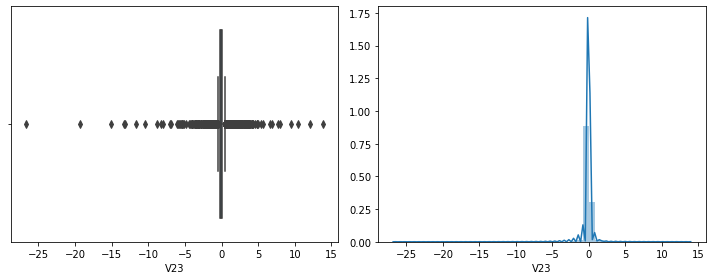

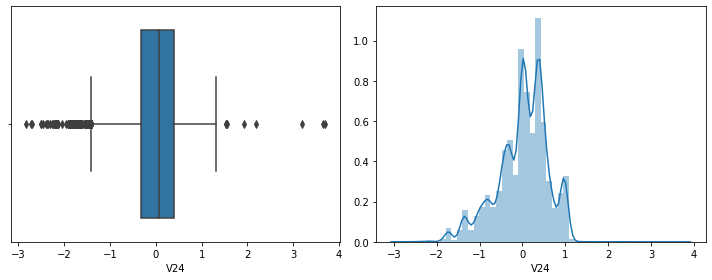

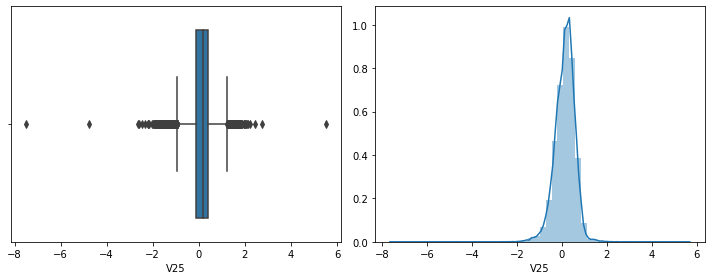

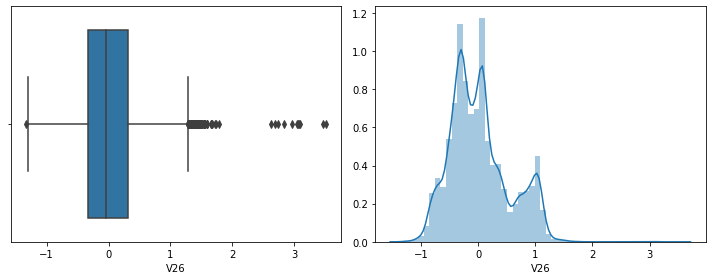

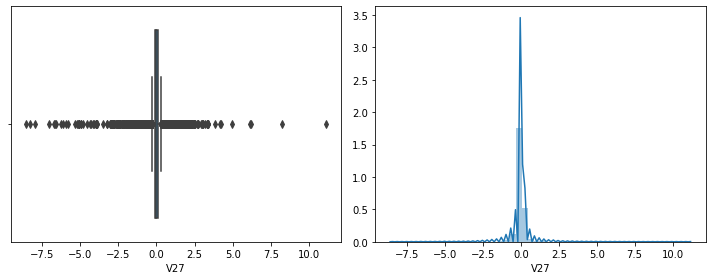

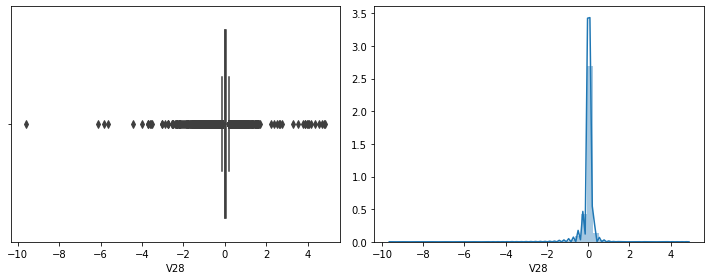

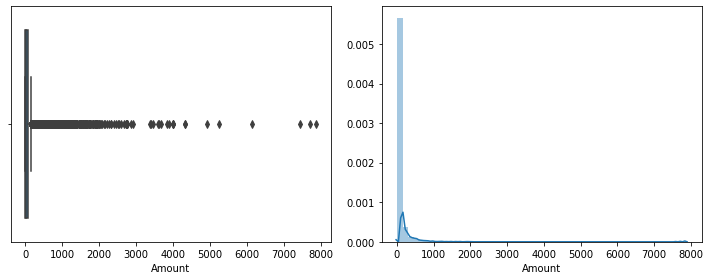

In [25]:
## Univariate Analysis:

for i in X.columns:
    fig=plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.boxplot(X[i])
    
    plt.subplot(122)
    sns.distplot(X[i])
    fig.tight_layout()
    plt.show()

## Inference:
## Column time does not have outliers in it.
## Other than Time all other columns have extreme values or outliers which can't be denoted due to PCA.

## So a distplot is also used to see the distribution and check skewness.
## Columns V1,V2,V3,V5,V6,V7,V8,V12,V14,V16,V17,V20,V21,V23,V27,V28,Amount all seem to be skewed.
## So the skewness has to be removed from these columns.

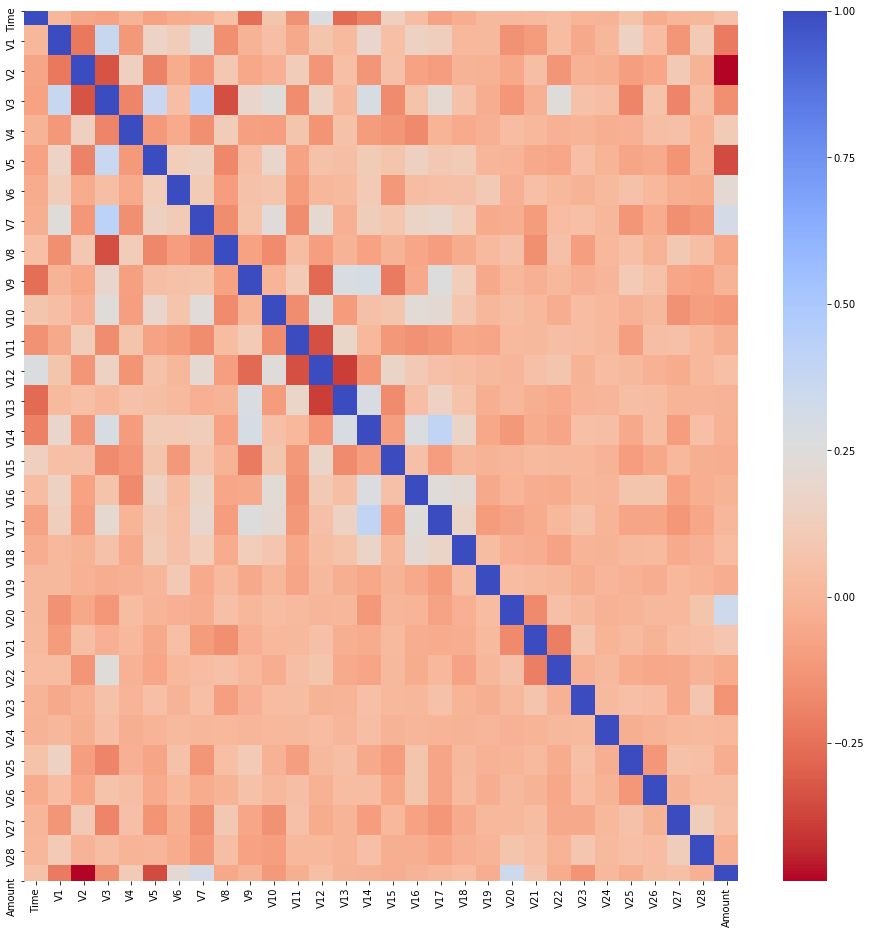

In [129]:
fig=plt.figure(figsize=(16,16))
sns.heatmap(X.corr(),cmap='coolwarm_r', annot_kws={'size':20})

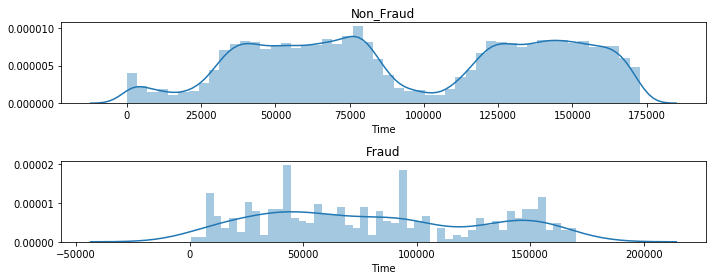

In [110]:
## Comparing the time  wrt class 0 and 1 to see the number of transactions occuring in each class 
fig=plt.figure(figsize=(10,4))

plt.subplot(2,1,1)
sns.distplot(df_sig[df_sig['Class']==0]['Time'],bins=50)

plt.title('Non_Fraud')

plt.subplot(2,1,2)
sns.distplot(df_sig[df_sig['Class']==1]['Time'],bins=50)

plt.title('Fraud')
fig.tight_layout()
plt.show()


## We can see that non_fraud transactions seem to be normally distributed whereas fraud transactions are not normally distributed
## Also the fraud actions can be seen as high  around 45000 and 90000 seconds.

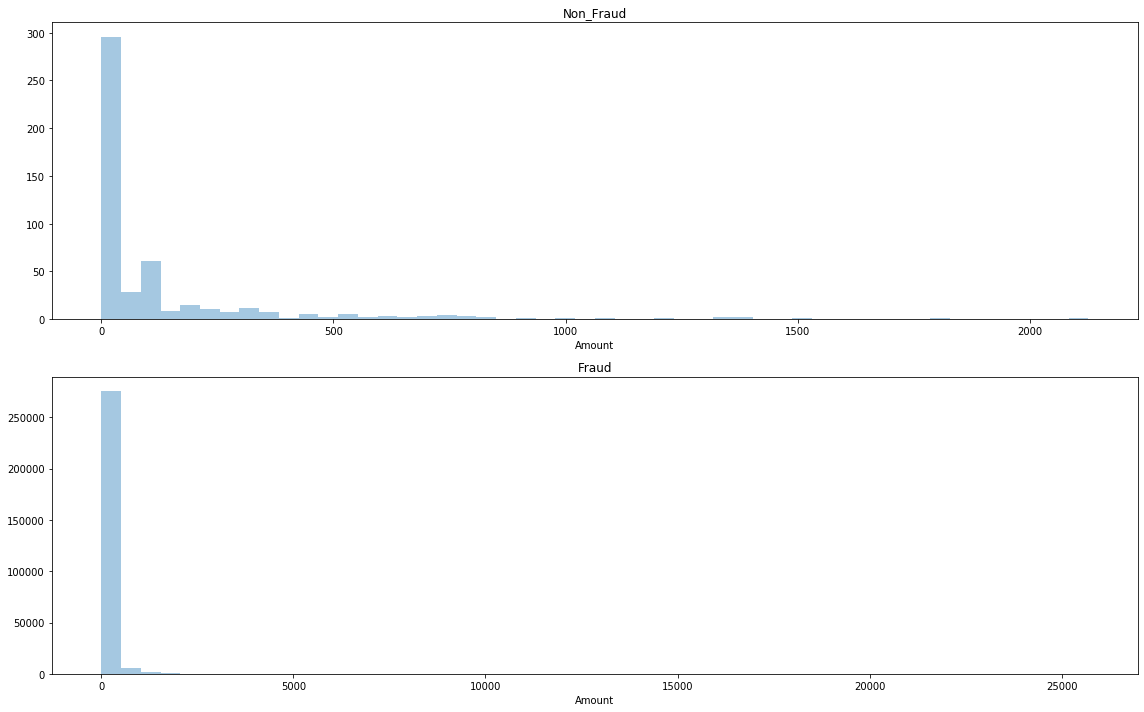

In [116]:
## Comparing the amount  wrt class 0 and 1 to see the number of transactions occuring in each class 
fig=plt.figure(figsize=(16,10))

plt.subplot(2,1,1)
sns.distplot(df_sig[df_sig['Class']==1]['Amount'],kde=False)

plt.title('Non_Fraud')

plt.subplot(2,1,2)
sns.distplot(df_sig[df_sig['Class']==0]['Amount'],kde=False)

plt.title('Fraud')
fig.tight_layout()
plt.show()


## We can see that fraud activities take place mostly when the amount is small.So it is a relief that fraudulent activities won't occur for larger amounts. 

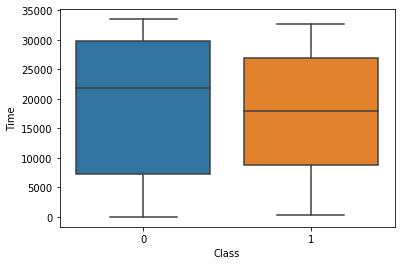

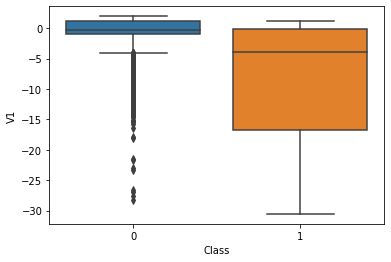

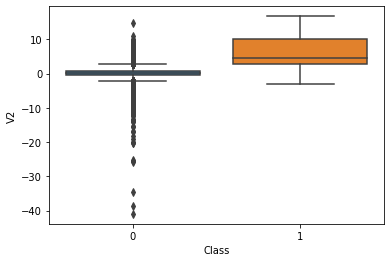

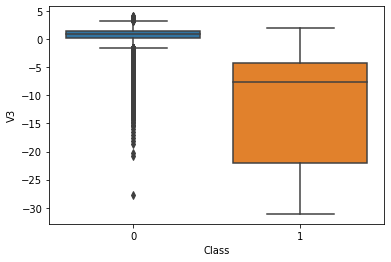

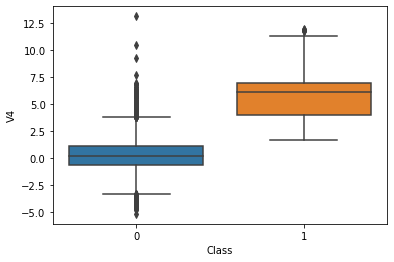

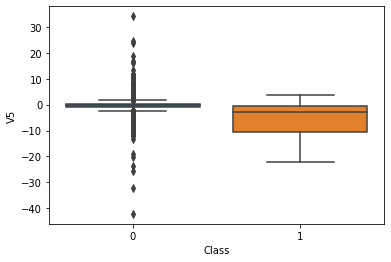

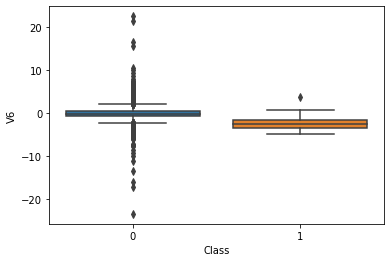

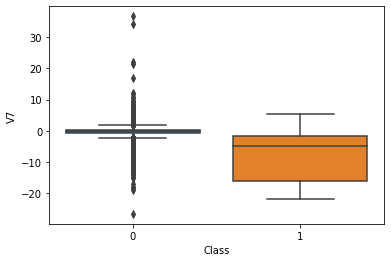

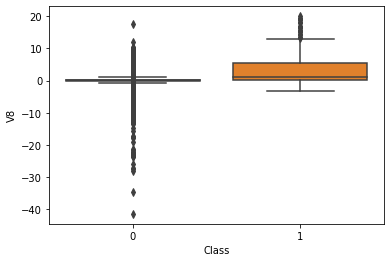

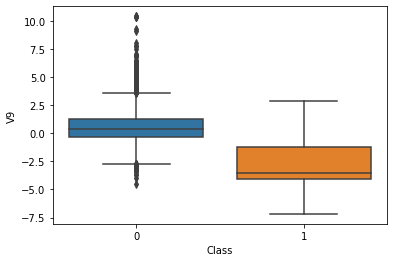

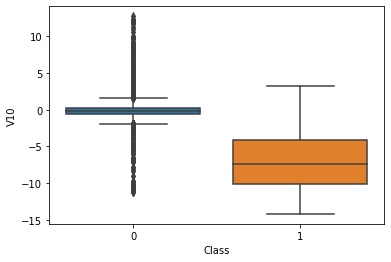

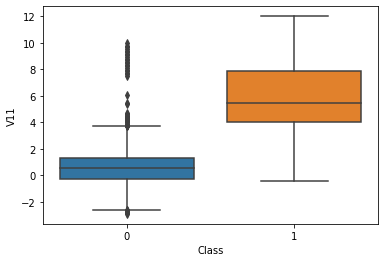

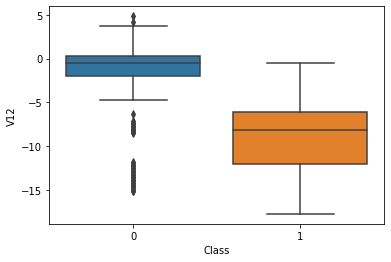

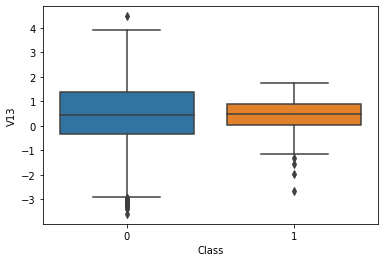

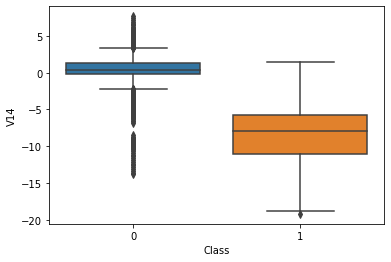

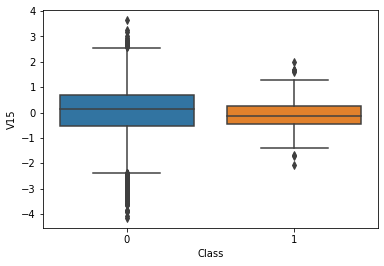

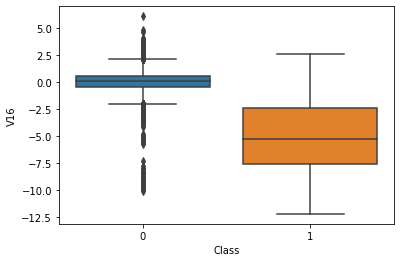

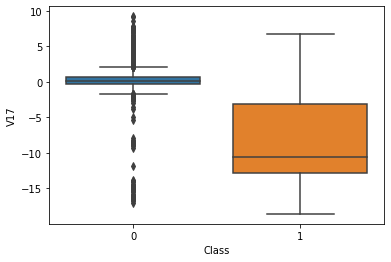

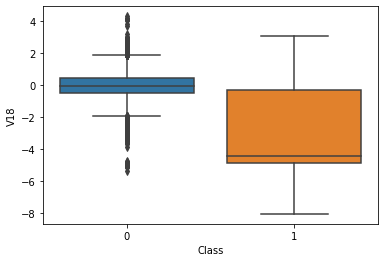

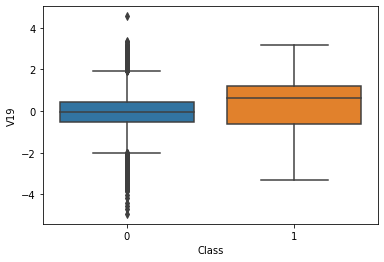

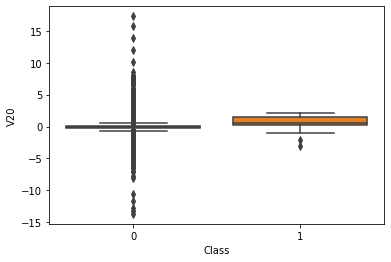

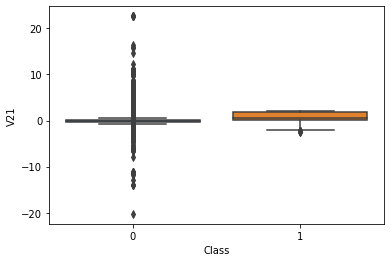

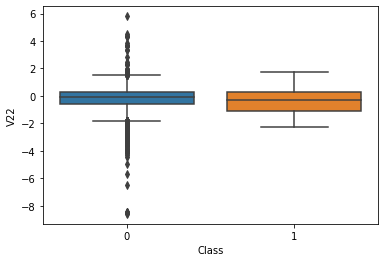

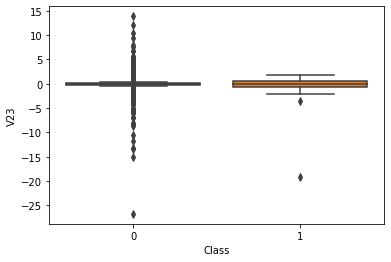

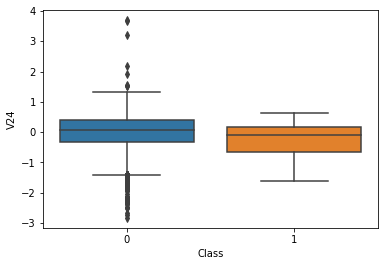

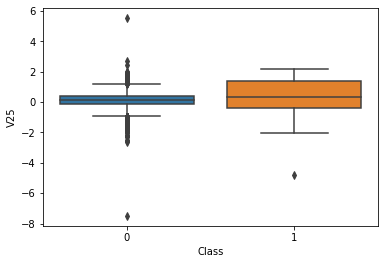

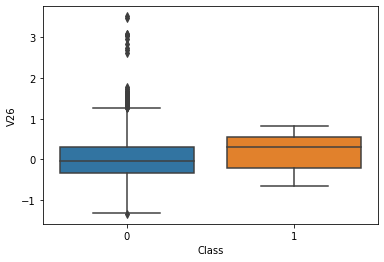

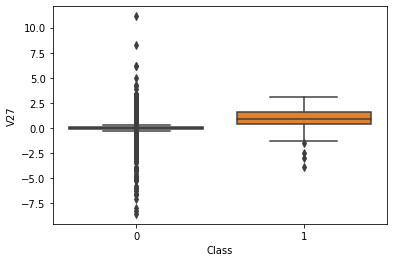

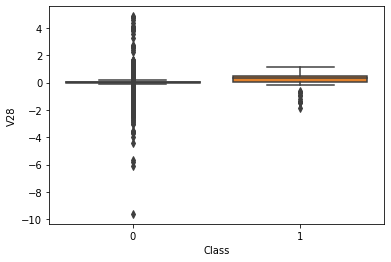

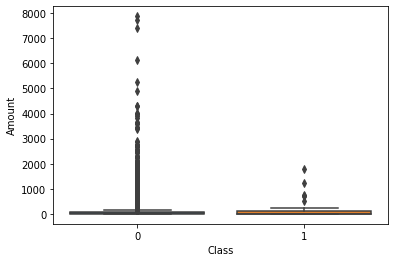

In [69]:
## bivariate analysis of every variable with target variable
for i in X.columns:
    sns.boxplot(y,X[i])
    plt.show()

## Inference:
## For time the variability is high for class 0 and the medians differ as the notches dont overlap.
## In V13,V15,V22,V25,V24..the notches overlap or are very close to overlapping.
## There is no variability or very low variablity for :
    ## Class 0 and class 1 in amount
    ## Class 0 and class 1 in V28
    ## Class 0 in V27
    ## Class 0 and class 1 in V23
    ## Class 0 in V21
    ## Class 0 in V20,
    ## class 1 in v20
    ## class 0 in V17 
    ## class 0 in V10
    ## Class 0 in V8
    ## class 0 in V7
    ## class 0 in V6 and class 1 V6
    ## Class 0 in V5
    ## class 0 in v3
    ## class 0 in V2
    
## Class 0's in most of the columns have low variability as most of the values are extreme or outliers.
## This is due to the PCA done to the original data.
## In most columns the class of 1 has high variability compared to class 0
## Except in columns time,V13,V15,V24,V26.

## Significant Variables:

In [73]:
df_sig=pd.read_csv('creditcard.csv')
pd.set_option('display.max_columns',None)

In [74]:
X_sig=df_sig.drop('Class',axis=1)
y_sig=df_sig['Class']

In [75]:

import statsmodels.api as sm
xc=sm.add_constant(X_sig)

In [76]:
log=sm.Logit(y_sig,xc).fit()
log.summary()

Optimization terminated successfully.
         Current function value: 0.003914
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               284807
Model:                          Logit   Df Residuals:                   284776
Method:                           MLE   Df Model:                           30
Date:                Thu, 09 Sep 2021   Pseudo R-squ.:                  0.6922
Time:                        22:57:58   Log-Likelihood:                -1114.8
converged:                       True   LL-Null:                       -3621.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.3917      0.249    -33.652      0.000      -8.880      -7.903
Time       -3.742e-06   2.26e-06     -1.659      0.097   -8.16e-06    6.79e-07
V1             0.0960      0.042      2.264      0.024       0.013       0.179
V2             0.0094      0.058      0.161      0.872      -0.104       0.123
V3            -0.0079      0.053     -0.149      0.881      -0.112       0.096
V4             0.6986      0.074      9.454      0.000       0.554       0.843
V5             0.1295      0.067      1.944      0.052      -0.001       0.260
V6            -0.1198      0.074     -1.626      0.104      -0.264       0.025
V7            -0.0969      0.067     -1.453      0.146      -0.228       0.034
V8            -0.1739      0.030     -5.711      0.000      -0.234      -0.114
V9            -0.2843      0.111     -2.561      0.010      -0.502      -0.067
V10           -0.8176      0.097     -8.432      0.000      -1.008      -0.628
V11           -0.0621      0.081     -0.762      0.446      -0.222       0.098
V12            0.0909      0.087      1.045      0.296      -0.080       0.261
V13           -0.3312      0.082     -4.058      0.000      -0.491      -0.171
V14           -0.5571      0.062     -8.949      0.000      -0.679      -0.435
V15           -0.1141      0.086     -1.330      0.183      -0.282       0.054
V16           -0.1908      0.125     -1.526      0.127      -0.436       0.054
V17           -0.0216      0.070     -0.309      0.757      -0.159       0.116
V18           -0.0131      0.129     -0.102      0.919      -0.266       0.240
V19            0.0963      0.097      0.993      0.321      -0.094       0.286
V20           -0.4582      0.082     -5.607      0.000      -0.618      -0.298
V21            0.3898      0.060      6.494      0.000       0.272       0.507
V22            0.6297      0.134      4.707      0.000       0.367       0.892
V23           -0.0951      0.058     -1.629      0.103      -0.209       0.019
V24            0.1289      0.147      0.874      0.382      -0.160       0.418
V25           -0.0761      0.131     -0.582      0.560      -0.332       0.180
V26            0.0195      0.190      0.103      0.918      -0.352       0.392
V27           -0.8188      0.122     -6.686      0.000      -1.059      -0.579
V28           -0.2937      0.088     -3.332      0.001      -0.467      -0.121
Amount         0.0009      0.000      2.449      0.014       0.000       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### For a column to be considered significant statistically ,the p_value should be less than 0.05.
### Else it is insignificant.

### So the values considered significant are v1,v4,v5,v8,v9,v10,v20,v21,v22,v27,v28,Amount.

## No ttest:



In [134]:
import scipy.stats as stats

In [135]:
lisa_shap=[]
lisb_shap=[]
for i in X_sig.columns:
    
    a=df_sig[df_sig['Class']==0][i]
    b=df_sig[df_sig['Class']==1][i]
    lisa_shap.append(stats.shapiro(a)[1])
    lisb_shap.append(stats.shapiro(b)[1])


C:\Users\Dell\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [136]:
lisa_shap

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.4119051698928876e-31,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

### Comparing the input variables with output variable statistically ie using two sample ttest is not possible as it fails the shapiro test for normality

## Model Building:

In [26]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

## Base Model:

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X1,y_sm,test_size=0.3,random_state=10)


In [29]:
## Logistic Regression:
base_mod=LogisticRegression()
base_mod.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [30]:
base_pred_test=base_mod.predict(X_test)
base_pred_train=base_mod.predict(X_train)

In [31]:
print(classification_report(y_test,base_pred_test)) ## classification report for test data

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7447
           1       0.98      0.93      0.96       774

    accuracy                           0.99      8221
   macro avg       0.99      0.97      0.98      8221
weighted avg       0.99      0.99      0.99      8221



In [32]:
print(classification_report(y_train,base_pred_train)) ## classification report for train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17465
           1       0.98      0.95      0.97      1717

    accuracy                           0.99     19182
   macro avg       0.99      0.97      0.98     19182
weighted avg       0.99      0.99      0.99     19182



In [33]:
confusion_matrix(y_test,base_pred_test) ## confusion matrix for test data

array([[7435,   12],
       [  51,  723]], dtype=int64)

In [34]:
confusion_matrix(y_train,base_pred_train) ## confusion matrix for train data

array([[17435,    30],
       [   86,  1631]], dtype=int64)

In [35]:
## KNN Base model:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn1=KNeighborsClassifier()
knn1.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
knn_pred_test=knn1.predict(X_test)
knn_pred_train=knn1.predict(X_train)

In [38]:
print(classification_report(y_test,base_pred_test)) ## classification report for test data

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7447
           1       0.98      0.93      0.96       774

    accuracy                           0.99      8221
   macro avg       0.99      0.97      0.98      8221
weighted avg       0.99      0.99      0.99      8221



In [39]:
print(classification_report(y_train,base_pred_train)) ## classification report for train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17465
           1       0.98      0.95      0.97      1717

    accuracy                           0.99     19182
   macro avg       0.99      0.97      0.98     19182
weighted avg       0.99      0.99      0.99     19182



In [44]:
## Naive Bayes:
from sklearn.naive_bayes import GaussianNB

In [45]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [46]:
y_pred_test_gaussian=gnb.predict(X_test)
y_pred_train_gaussian=gnb.predict(X_train)

In [47]:
print(classification_report(y_test,y_pred_test_gaussian))  ## classification report for test data

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7447
           1       0.83      0.91      0.86       774

    accuracy                           0.97      8221
   macro avg       0.91      0.94      0.93      8221
weighted avg       0.97      0.97      0.97      8221



In [48]:
print(classification_report(y_train,y_pred_train_gaussian))  ## classification report for train data

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     17465
           1       0.83      0.94      0.88      1717

    accuracy                           0.98     19182
   macro avg       0.91      0.96      0.93     19182
weighted avg       0.98      0.98      0.98     19182



In [49]:
## Boosting algorithms:

## Ada Boost:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [64]:
adaboost = AdaBoostClassifier()

In [65]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [66]:
y_pred_train = adaboost.predict(X_train)
print(classification_report(y_train,y_pred_train))   ## classification report for train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17465
           1       1.00      1.00      1.00      1717

    accuracy                           1.00     19182
   macro avg       1.00      1.00      1.00     19182
weighted avg       1.00      1.00      1.00     19182



In [67]:
y_pred_test = adaboost.predict(X_test)
print(classification_report(y_test,y_pred_test))    ## classification report for test data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7447
           1       0.99      0.99      0.99       774

    accuracy                           1.00      8221
   macro avg       1.00      1.00      1.00      8221
weighted avg       1.00      1.00      1.00      8221



In [57]:
## Gradient Boosting:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [59]:
y_pred_train = gb.predict(X_train)
print(classification_report(y_train,y_pred_train))    ## classification report for train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17465
           1       1.00      1.00      1.00      1717

    accuracy                           1.00     19182
   macro avg       1.00      1.00      1.00     19182
weighted avg       1.00      1.00      1.00     19182



In [58]:
y_pred_test = gb.predict(X_test)
print(classification_report(y_test,y_pred_test))    ## classification report for test data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7447
           1       0.99      0.98      0.99       774

    accuracy                           1.00      8221
   macro avg       0.99      0.99      0.99      8221
weighted avg       1.00      1.00      1.00      8221



In [60]:
## XGBoost:
xgb =XGBClassifier()

In [61]:
xgb.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
y_pred_train = xgb.predict(X_train)
print(classification_report(y_train,y_pred_train))    ## classification report for train data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17465
           1       1.00      1.00      1.00      1717

    accuracy                           1.00     19182
   macro avg       1.00      1.00      1.00     19182
weighted avg       1.00      1.00      1.00     19182



C:\Users\Dell\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [63]:
y_pred_test = xgb.predict(X_test)
print(classification_report(y_test,y_pred_test))     ## classification report for test data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7447
           1       1.00      1.00      1.00       774

    accuracy                           1.00      8221
   macro avg       1.00      1.00      1.00      8221
weighted avg       1.00      1.00      1.00      8221



C:\Users\Dell\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


### For a credit card fraud detection, it is necessary to reduce the Type 2 error 
### As its wrong to classify a fraud person as not fraud  rather than the vice versa.
### Its very dangerous for the credit card companies to have a high type two error ie false negatives.
